<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorial/blob/todo/ComputerVisionTutorial11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Object Tracking
##Goal
Given the initial location of an object, track location in subsequent frames

In [1]:
#importing modules
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, YouTubeVideo, display
from matplotlib.animation import FuncAnimation

#Tracker Class in OpenCV
1. Boosting
2. MIL
3. KCF
4. CRST
5. TLD
- Tends to recover from occulusions
6. MEDIANFLOW
- Good for predictable slow motion
7. GOTURN
- Deep Learning based
- Most Accurate
8. MOSSE
- Fastest

In [6]:
#drawing rectangle
def drawRectangle(frame, bbox):
  p1 = (int(bbox[0]), int(bbox[1]))
  p2 = (int(bbox[0] + bbox[2]), int(bbox[1]+bbox[3]))
  cv.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)

#displaying rectangle
def displayRectangle(frame, bbox):
  plt.figure(figsize=(20, 10))
  frameCopy = frame.copy()
  drawRectangle(frameCopy, bbox)
  frameCopy = cv.cvtColor(frameCopy, cv.COLOR_RGB2BGR)
  plt.imshow(frameCopy)
  plt.axis("off")

#drawing text
def drawText(frame, txt, location, color=(50, 170, 50)):
  cv.putText(frame, txt, location, cv.FONT_HERSHEY_SIMPLEX, 1, color, 3)

#Creating the tracker instance

In [3]:
#setup tracker
tracker_types = [
    "BOOSTING",
    "MIL",
    "KCF",
    "CSRT",
    "TLD",
    "MEDIANFLOW",
    "GOTURN",
    "MOSSE",
]

tracker_type = tracker_types[0]

#Reading video and setupping output video
##first tracker type is boosting

In [4]:
#reading video
video = cv.VideoCapture("/content/drive/MyDrive/ComputerVisionTutorial/VideosToPractise/race_car.mp4")
ok, frame = video.read()
if video.isOpened():
  width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
  height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))

video_output_file_name = "race_car"+tracker_type+".mp4"
video_out = cv.VideoWriter(video_output_file_name, cv.VideoWriter_fourcc(*"XVID"), 10, (width, height))


#Defining bounding box

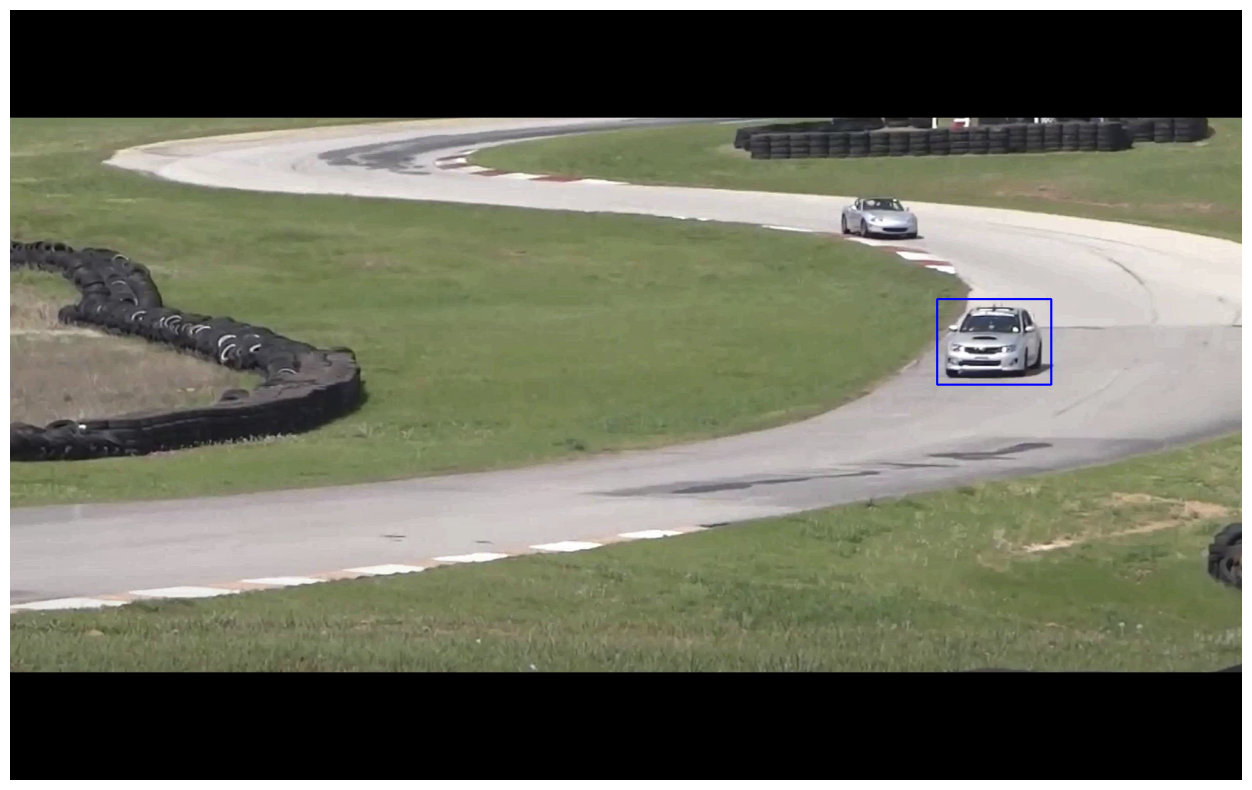

In [7]:
#defining bounding box
bbox = (1300, 405, 160, 120)
displayRectangle(frame, bbox)

#Initialize Tracker
1. One frame
2. A bounding box

In [9]:
#initalizing tracker
if tracker_type == "BOOSTING":
  tracker = cv.legacy.TrackerBoosting.create()

ok = tracker.init(frame, bbox)

#Reading frame and track object

In [10]:
while True:
  ok, frame = video.read()
  if not ok:
    break

  #starting timer
  timer = cv.getTickCount()

  #update tracker
  ok, bbox = tracker.update(frame)

  #calculating fps
  fps = cv.getTickFrequency() / (cv.getTickCount() - timer)

  #draw bounding box
  if ok:
    drawRectangle(frame, bbox)
  else:
    drawText(frame, "Tracking failure detected", (80, 140), (0, 0, 255))


  #display Info
  drawText(frame, tracker_type+"Tracker", (80, 60))
  drawText(frame, "FPS : "+str(int(fps)), (80, 100))

  #write frame to video
  video_out.write(frame)

video.release()
video_out.release()

#Changing video encoding

In [11]:
#installing ffmpeg
!apt-get -qq install ffmpeg

#changing video encoding of mp4 from XVID to h264
!ffmpeg -y -i {video_output_file_name} -c:v libx264 $"race_car_boosting_x264.mp4" -hide_banner -loglevel error

#Rendering mp4 video

In [12]:
from matplotlib.font_manager import b64encode
mp4 = open("/content/race_car_boosting_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64,"+b64encode(mp4).decode()
HTML(f"""<video width=1024 controls><source src="{data_url}" type="video/mp4"></video>""")